Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 150.3333282470703
Epoch 1 - loss: 6.120000839233398
Epoch 2 - loss: 36.42483139038086
Epoch 3 - loss: 18.104557037353516
Epoch 4 - loss: 6.065776824951172
Epoch 5 - loss: 10.368836402893066
Epoch 6 - loss: 6.232229709625244
Epoch 7 - loss: 5.852260589599609
Epoch 8 - loss: 6.088119983673096
Epoch 9 - loss: 5.494866847991943
Epoch 10 - loss: 5.574592590332031
Epoch 11 - loss: 5.53674840927124
Epoch 12 - loss: 5.476493835449219
Epoch 13 - loss: 5.4938530921936035
Epoch 14 - loss: 5.480626583099365
Epoch 15 - loss: 5.477015972137451
Epoch 16 - loss: 5.478648662567139
Epoch 17 - loss: 5.476379871368408
Epoch 18 - loss: 5.476480484008789
Epoch 19 - loss: 5.4764628410339355
Epoch 20 - loss: 5.476190567016602
Epoch 21 - loss: 5.476251602172852
Epoch 22 - loss: 5.476212978363037
Epoch 23 - loss: 5.476192474365234
Epoch 24 - loss: 5.476198673248291
E

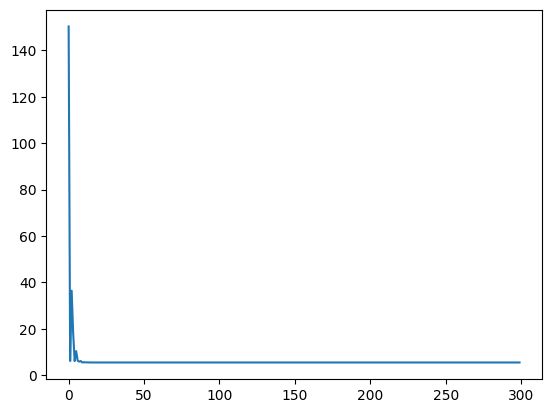

In [9]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## Batch GD based update ##############       
      
for epoch in range(300):   
    optimizer.zero_grad()
    outputs = net(data)
    loss = criterion(outputs, target)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")

Epoch 0 - avg loss: 14.702662
Epoch 1 - avg loss: 17.981298
Epoch 2 - avg loss: 14.707301
Epoch 3 - avg loss: 17.970949
Epoch 4 - avg loss: 14.711928
Epoch 5 - avg loss: 17.960681
Epoch 6 - avg loss: 14.716541
Epoch 7 - avg loss: 17.950474
Epoch 8 - avg loss: 14.721153
Epoch 9 - avg loss: 17.940322
Epoch 10 - avg loss: 14.725749
Epoch 11 - avg loss: 17.930223
Epoch 12 - avg loss: 14.730345
Epoch 13 - avg loss: 17.920188
Epoch 14 - avg loss: 14.734923
Epoch 15 - avg loss: 17.910209
Epoch 16 - avg loss: 14.739503
Epoch 17 - avg loss: 17.900282
Epoch 18 - avg loss: 14.744062
Epoch 19 - avg loss: 17.890420
Epoch 20 - avg loss: 14.748619
Epoch 21 - avg loss: 17.880616
Epoch 22 - avg loss: 14.753177
Epoch 23 - avg loss: 17.870858
Epoch 24 - avg loss: 14.757716
Epoch 25 - avg loss: 17.861160
Epoch 26 - avg loss: 14.762244
Epoch 27 - avg loss: 17.851525
Epoch 28 - avg loss: 14.766773
Epoch 29 - avg loss: 17.841951
Epoch 30 - avg loss: 14.771287
Epoch 31 - avg loss: 17.832425
Epoch 32 - avg los

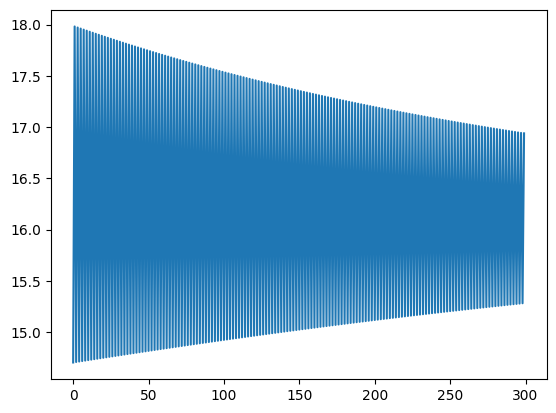

In [12]:
hist = []

############## SGD-based update ##############
for epoch in range(300):
    epoch_loss = 0.0 # adding epoch loss for ploting
    for x, y in zip(data, target):
        optimizer.zero_grad()
        out = net(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    hist.append(epoch_loss / len(data))
    print(f"Epoch {epoch} - avg loss: {epoch_loss / len(data):.6f}")
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)
    print(f"when x = {current_data}, y = {out.item():.4f}")

plt.plot(hist, label = "training curve")